In [83]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm as tqdm

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# Validation with experimental results

In [84]:
NACA = '0012'
NUM_POINTS_X = 26

ITERATIONS_MAX     = 1e4
ITERATIONS_RESTART = ITERATIONS_MAX

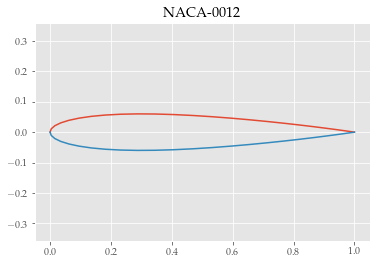

In [85]:
%run 1-Geometry.ipynb
%run 2-Solver.ipynb

---

## Computing the vortices

Compute the RHS, which depends on the incidence angle and the geometry. 

In [86]:
path_data = Path('../data/naca0012')

path_cl = path_data / 'cl.csv'

In [87]:
data_df = pd.read_csv(path_cl, 
                      sep = "\s+|\t+|\s+\t+|\t+\s+", 
                      engine = 'python', index_col='alpha')

data_df['Panel Method'] = np.nan

In [88]:
for alpha in tqdm(data_df.index):
    
    _, _ , cl = solve(alpha)
    
    data_df.loc[alpha, 'Panel Method'] = cl

100%|██████████| 28/28 [00:05<00:00,  4.73it/s]


In [89]:
data_df.index = np.round(data_df.index, 2)

In [90]:
data_df['Relative Error'] = (data_df['Experimental'] - data_df['Panel Method']).div(data_df['Experimental']).abs()
data_df['Absolute Error'] = (data_df['Experimental'] - data_df['Panel Method']).abs()

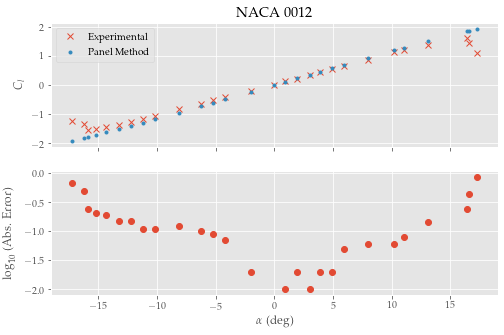

In [92]:
fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(8,5), sharex=True)

axes = axes.flatten()

data_df[['Experimental']].plot(marker = 'x', linewidth = 0.0, ax = axes[0])
data_df[['Panel Method']].plot(marker = '.', linewidth = 0.0, ax = axes[0])

axes[0].set(
       # title  = f'NACA 0012 - {N_b-1} panels', 
       title  = f'NACA 0012', 
       ylabel = '$C_l$', 
       xlabel = ''
           );

data_df['Absolute Error'].round(2).apply(np.log10).plot(marker = 'o', linewidth = 0.0, ax = axes[1])
axes[1].set( 
       ylabel = '$\\log_{10}$ (Abs. Error)', 
       xlabel = '$\\alpha$ (deg)');

plt.savefig(path_data / 'panels' / f'cl_comparison_{N_b-1}_panels.png', 
            transparent = False, 
            bbox_inches = 'tight', dpi = 300)

### Output results to CSV

In [154]:
data_df[['Experimental', 'Panel Method']].to_csv(path_data / 'panels' / f'cl_comparison_{N_b-1}_panels.csv')

In [156]:
data_df['Relative Error'].drop(index = 0.0).mul(100).describe().to_csv(path_data / 'panels' / f'cl_error_rel_{N_b-1}.csv')
data_df['Absolute Error'].drop(index = 0.0).mul(100).describe().to_csv(path_data / 'panels' / f'cl_error_abs_{N_b-1}.csv')